# Predicting Compressive Strength of Concrete

## Featurization, Model Selection and Tuning Tutorial

In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
%matplotlib inline

In [2]:
from sklearn.preprocessing import StandardScaler
#Import Skylearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split
# Import Linear Regression, Ridge and Lasso machine learning library
from sklearn.linear_model import LinearRegression, Ridge, Lasso
# Import KNN Regressor machine learning library
from sklearn.neighbors import KNeighborsRegressor
# Import Decision Tree Regressor machine learning library
from sklearn.tree import DecisionTreeRegressor
# Import ensemble machine learning library
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
# Import support vector regressor machine learning library
from sklearn.svm import SVR
# Import the metrics
from sklearn import metrics
# Import the Voting regressor for Ensemble
from sklearn.ensemble import VotingRegressor
# Import stats from scipy
from scipy import stats
# Import zscore for scaling
from scipy.stats import zscore
# Importing the metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Importing the K fold
from sklearn.model_selection import KFold
# Importing the cross validation score
from sklearn.model_selection import cross_val_score
# Importing the preprocessing library
from sklearn import preprocessing
# Importing the Polynomial features
from sklearn.preprocessing import PolynomialFeatures
# Importing kmeans clustering library
from sklearn.cluster import KMeans
from sklearn.utils import resample

In [3]:
pip install pyforest

In [4]:
from pyforest import*
lazy_imports()

['from scipy import signal as sg',
 'from sklearn import metrics',
 'from pathlib import Path',
 'from sklearn.ensemble import RandomForestClassifier',
 'import numpy as np',
 'from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn import svm',
 'import seaborn as sns',
 'from scipy import stats',
 'from xlrd import open_workbook',
 'from PIL import Image',
 'from sklearn.manifold import TSNE',
 'from sklearn.linear_model import LassoCV',
 'import statistics',
 'from sklearn.linear_model import LinearRegression',
 'import pickle',
 'import pandas as pd',
 'import cv2',
 'import altair as alt',
 'import sys',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from dask import dataframe as dd',
 'import tensorflow as tf',
 'import dash',
 'from sklearn.ensemble import RandomForestRegressor',
 'import glob',
 'from fbprophet import Prophet',
 'from pyspark import SparkContext',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.model_selection import cross_val_s

In [5]:
df = pd.read_csv("C:/Users/Admin/Documents/Jupyter/Predicting compressive strength of concrete/Concrete_Data_1.csv")

<IPython.core.display.Javascript object>

In [6]:
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


###### Observation
###### 1. It shows that there are eight independent variables and one dependent variable - compressive strength.
###### 2. All the records are numeric

In [7]:
df = df.rename(columns={'Cement (component 1)(kg in a m^3 mixture)':'cement',
                        'Blast Furnace Slag (component 2)(kg in a m^3 mixture)':'slag',
                        'Fly Ash (component 3)(kg in a m^3 mixture)':'ash',
                        'Water (component 4)(kg in a m^3 mixture)':'water',
                        "Superplasticizer (component 5)(kg in a m^3 mixture)":'superplastic',
                        'Coarse Aggregate (component 6)(kg in a m^3 mixture)':'coarseagg',
                        'Fine Aggregate (component 7)(kg in a m^3 mixture)':'fineagg',
                        'Age (day)':'age',
                        'Concrete compressive strength(MPa, megapascals)':'strength'
})

In [8]:
df.columns = ['cement', 'slag', 'ash', 'water', 'superplasticizer', 'coarseagg', 'fineagg', 'age', 'strength']

In [9]:
df.head()

,cement,slag,ash,water,superplasticizer,coarseagg,fineagg,age,strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [10]:
df.dtypes

cement              float64
slag                float64
ash                 float64
water               float64
superplasticizer    float64
coarseagg           float64
fineagg             float64
age                   int64
strength            float64
dtype: object

In [11]:
df.shape

(1030, 9)

In [12]:
#checking for missing values
df.isnull().sum()

cement              0
slag                0
ash                 0
water               0
superplasticizer    0
coarseagg           0
fineagg             0
age                 0
strength            0
dtype: int64

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplasticizer,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


## Exploratroy Data Analysis

#### Cement

In [104]:
#Quartiles
from scipy import stats

cement_Q1=df['cement'].quantile(q=0.25)
cement_Q3=df['cement'].quantile(q=0.75)

print('1st Quartile (cement_Q1) is: ',Q1)
print('3rd Quartile (cement_Q3) is: ',Q3)
print('Interquartile range (cement_IQR) is ', stats.iqr(df['cement']))

1st Quartile (cement_Q1) is:  192.375
3rd Quartile (cement_Q3) is:  350.0
Interquartile range (cement_IQR) is  157.625


In [105]:
#Outlier detection from Interquartile range (IQR) in original data


L_outliers=Q1-1.5*(cement_Q3-cement_Q1)
U_outliers=Q3+1.5*(cement_Q3-cement_Q1)
print('Lower outlier limit in cement: ',L_outliers)
print('Upper outlier limit in cement: ',U_outliers)

Lower outlier limit in cement:  -44.0625
Upper outlier limit in cement:  586.4375


In [16]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in cement upper: ', df[df['cement']>586.4375]['cement'].count())
print('Number of outliers in cement lower: ', df[df['cement']<-44.0625]['cement'].count())

# print('% of Outlier in cement upper: ', round(df[df['cement']>586.4375]['cement'].count()*100/len(df)))
# print('% of Outlier in cement lower: ', round(df[df['cement']<-44.0625]['cement'].count()*100/len(df)))

Number of outliers in cement upper:  0
Number of outliers in cement lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='cement'>

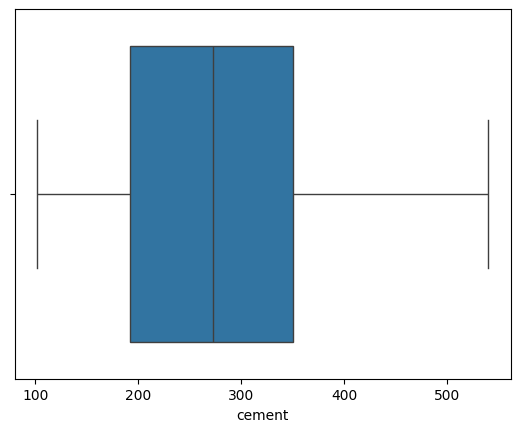

In [17]:
#Distribution of CEMENT

sns.boxplot(x='cement',data=df, orient='h')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: 'FacetGrid' object has no attribute 'set_title'

<Figure size 1000x800 with 0 Axes>

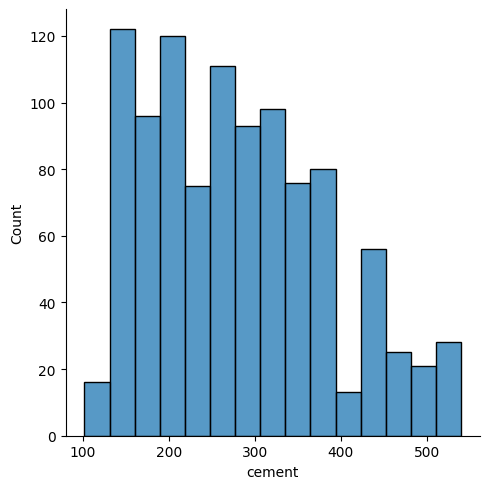

In [101]:
plt.figure(figsize=(10,8))
sns.displot(df['cement']).set_title('cement')
plt.show()

#### Ash

In [19]:
#Quartiles
from scipy import stats

Q1=df['ash'].quantile(q=0.25)
Q3=df['ash'].quantile(q=0.75)

print('1st Quartile (Q1) is: ',Q1)
print('3rd Quartile (Q3) is: ',Q3)
print('Interquartile range (IQR) is ', stats.iqr(df['ash']))

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  118.3
Interquartile range (IQR) is  118.3


In [20]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)
print('Lower outlier limit in ash: ',L_outliers)
print('Upper outlier limit in ash: ',U_outliers)

Lower outlier limit in ash:  -177.45
Upper outlier limit in ash:  295.75


In [21]:
print('Number of outliers in ash upper: ', df[df['ash']>586.4375]['ash'].count())
print('Number of outliers in ash lower: ', df[df['ash']<-44.0625]['ash'].count())

# print('% of Outlier in cement upper: ', round(df[df['ash']>586.4375]['ash'].count()*100/len(df)))
# print('% of Outlier in cement lower: ', round(df[df['ash']<-44.0625]['ash'].count()*100/len(df)))

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10168\572359132.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['ash']).set_title('Ash')


<IPython.core.display.Javascript object>

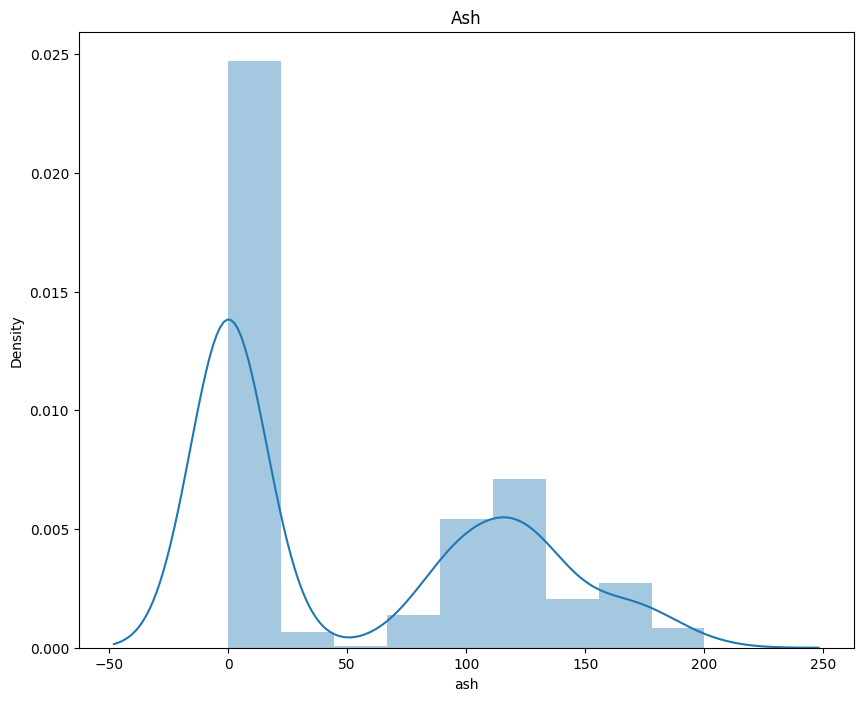

In [22]:
#displot

plt.figure(figsize=(10,8))
sns.distplot(df['ash']).set_title('Ash')
plt.show()

#### Water

In [23]:
#Quartiles

w_Q1=df['water'].quantile(q=0.25)
w_Q3=df['water'].quantile(q=0.75)

print('1st Quartile (Q1) is: ', w_Q1)
print('3rd Quartile (Q3) is: ', w_Q3)
print('Interquartile range (IQR) is: ', stats.iqr(df['water']))

1st Quartile (Q1) is:  164.9
3rd Quartile (Q3) is:  192.0
Interquartile range (IQR) is:  27.099999999999994


In [24]:
#Outlier detection from Interquartile range (IQR) in original data

WL_outliers=w_Q1-1.5*(w_Q3-w_Q1)
WU_outliers=w_Q3+1.5*(w_Q3-w_Q1)

print('Lower outlier in water: ',WL_outliers)
print('Upper outlier in water: ',WU_outliers)

Lower outlier in water:  124.25000000000001
Upper outlier in water:  232.64999999999998


In [30]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in water upper: ', df[df['water']>232.64999999999998]['water'].count())
print('Number of outliers in water lower: ', df[df['water']<124.25000000000001]['water'].count())

upper_percent = df[df['water'] > 232.65]['water'].count() * 100 / len(df)
lower_percent = df[df['water'] < 124.25]['water'].count() * 100 / len(df)
print('% of Outlier in water upper: {:.2f}%'.format(upper_percent))
print('% of Outlier in water lower: {:.2f}%'.format(lower_percent))

Number of outliers in water upper:  4
Number of outliers in water lower:  5
% of Outlier in water upper: 0.39%
% of Outlier in water lower: 0.49%


<IPython.core.display.Javascript object>

<Axes: xlabel='water'>

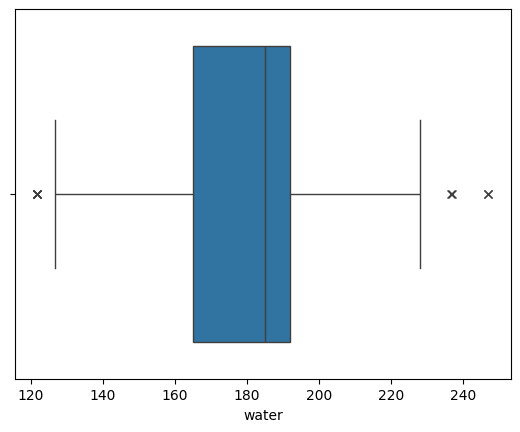

In [26]:
#Distribution of WATER

sns.boxplot(x='water', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10168\2153982199.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['water']).set_title('water')


<IPython.core.display.Javascript object>

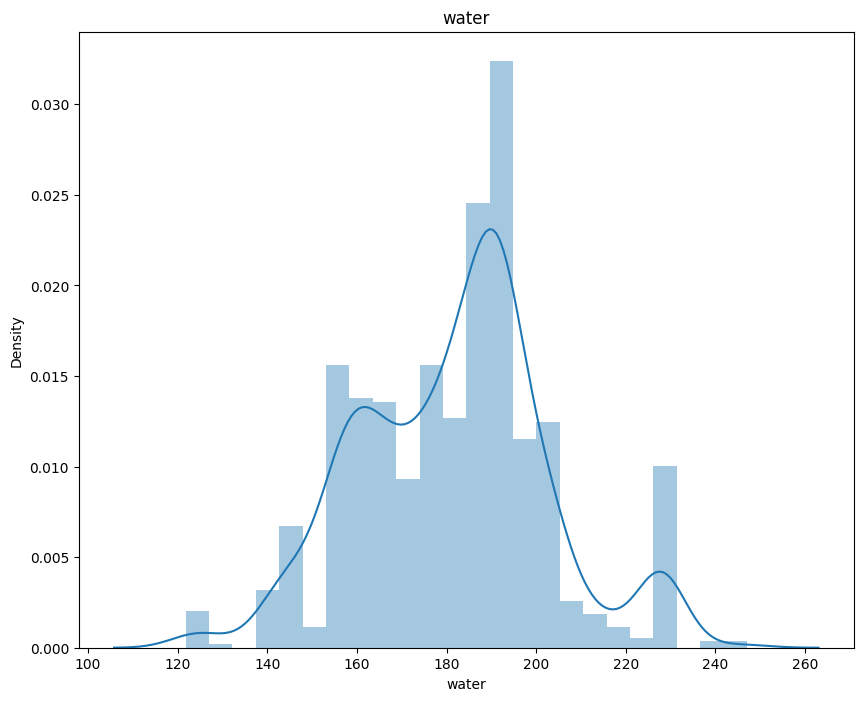

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(df['water']).set_title('water')
plt.show()

#### Slag

In [28]:
#Quartiles

w_Q1=df['slag'].quantile(q=0.25)
w_Q3=df['slag'].quantile(q=0.75)

print('1st Quartile (Q1) is: ', w_Q1)
print('3rd Quartile (Q3) is: ', w_Q3)
print('Interquartile range (IQR) is: ', stats.iqr(df['slag']))

1st Quartile (Q1) is:  0.0
3rd Quartile (Q3) is:  142.95
Interquartile range (IQR) is:  142.95


In [29]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in slag: ',L_outliers)
print('Upper outlier in slag: ',U_outliers)

Lower outlier in slag:  -177.45
Upper outlier in slag:  295.75


In [33]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in slag upper: ', df[df['slag']>357.375]['slag'].count())
print('Number of outliers in slag lower: ', df[df['slag']<-214.425]['slag'].count())

upper_percent = df[df['slag'] > 232.65]['slag'].count() * 100 / len(df)
print('% of Outlier in slag upper: {:.2f}%'.format(upper_percent))

Number of outliers in slag upper:  2
Number of outliers in slag lower:  0
% of Outlier in slag upper: 5.34%


<IPython.core.display.Javascript object>

<Axes: xlabel='slag'>

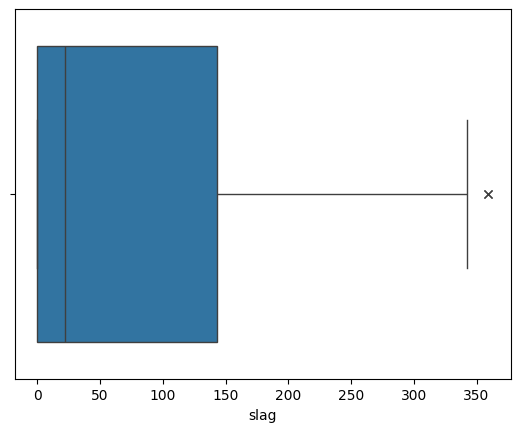

In [35]:
#Distribution of Slag

sns.boxplot(x='slag', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10168\3227964707.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['slag']).set_title('slag')


<IPython.core.display.Javascript object>

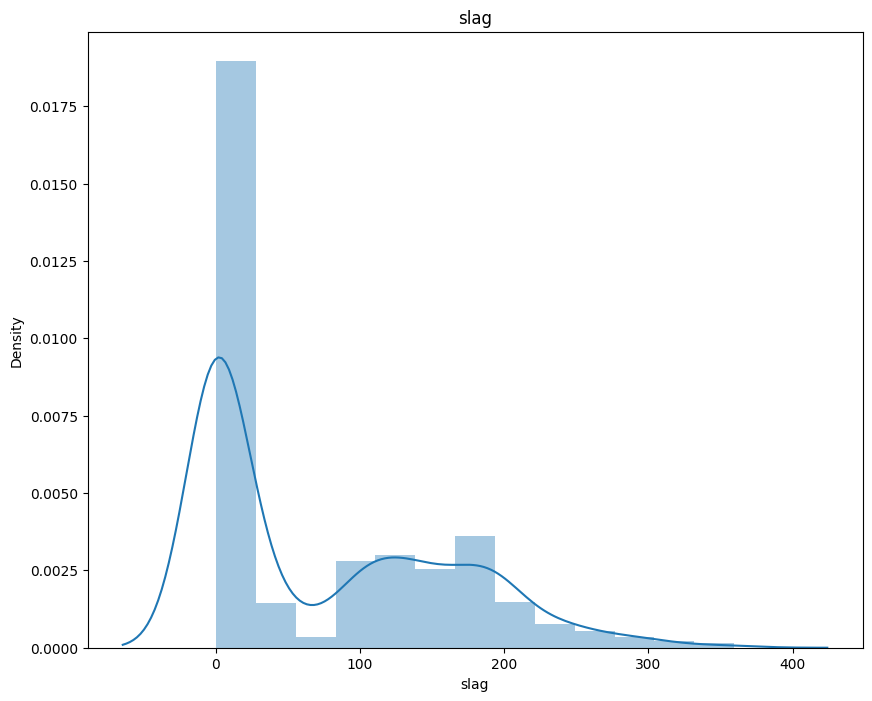

In [36]:
plt.figure(figsize=(10,8))
sns.distplot(df['slag']).set_title('slag')
plt.show()

#### Age 

In [37]:
#Quartiles

w_Q1=df['age'].quantile(q=0.25)
w_Q3=df['age'].quantile(q=0.75)

print('1st Quartile (Q1) is: ', w_Q1)
print('3rd Quartile (Q3) is: ', w_Q3)
print('Interquartile range (IQR) is: ', stats.iqr(df['age']))

1st Quartile (Q1) is:  7.0
3rd Quartile (Q3) is:  56.0
Interquartile range (IQR) is:  49.0


In [78]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(Q3-Q1)
U_outliers=Q3+1.5*(Q3-Q1)

print('Lower outlier in age: ',L_outliers)
print('Upper outlier in age: ',U_outliers)

Lower outlier in age:  -15.299999999999999
Upper outlier in age:  25.5


In [39]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in age upper: ', df[df['age']>129.5]['age'].count())
print('Number of outliers in age lower: ', df[df['age']<-66.5]['age'].count())

Number of outliers in age upper:  59
Number of outliers in age lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='age'>

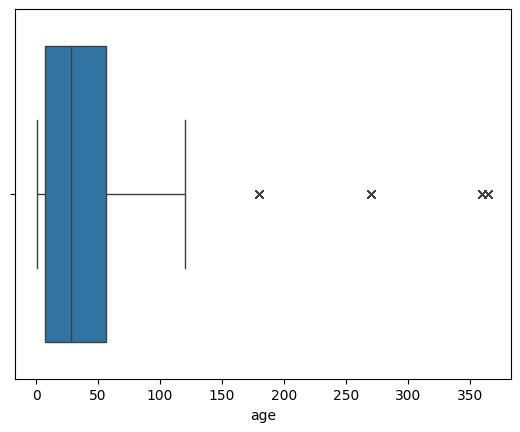

In [41]:
#Distribution of Age

sns.boxplot(x='age', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10168\738096326.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age']).set_title('age')


<IPython.core.display.Javascript object>

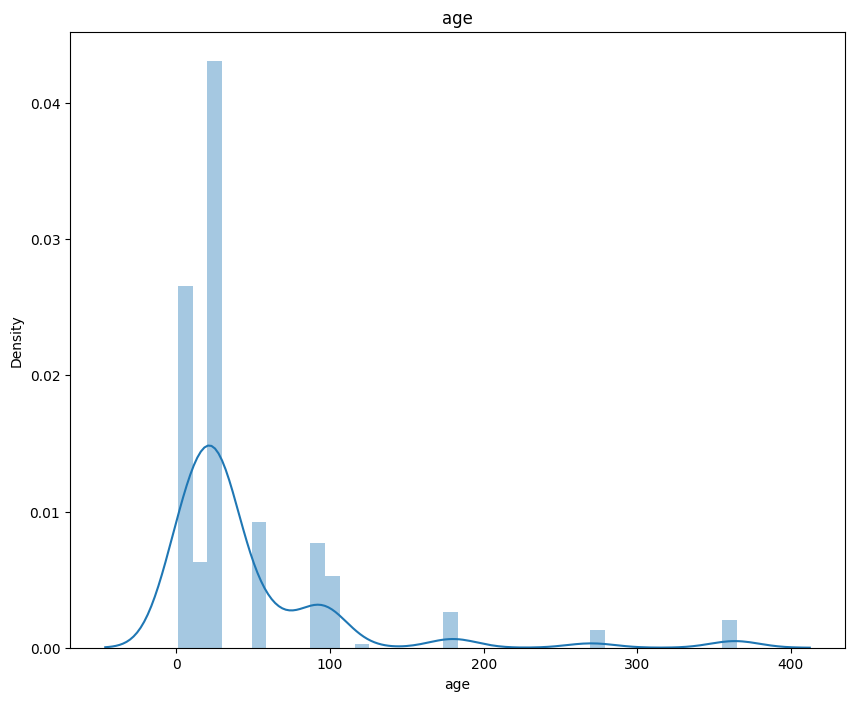

In [42]:
plt.figure(figsize=(10,8))
sns.distplot(df['age']).set_title('age')
plt.show()

#### Ash

In [100]:
#Quartiles

ash_Q'1=df['ash'].quantile(q=0.25)
ash_Q3=df['ash'].quantile(q=0.75)
'ash_IQR' = ash_Q3 - ash_Q1

print('1st Quartile (ash_Q1) is: ', w_Q1)
print('3rd Quartile (ash_Q3) is: ', w_Q3)
print ('ash_IQR')

SyntaxError: cannot assign to literal here. Maybe you meant '==' instead of '='? (30494836.py, line 5)

In [80]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=Q1-1.5*(ash_Q3-ash_Q1)
U_outliers=Q3+1.5*(ash_Q3-ash_Q1)

print('Lower outlier in ash: ',L_outliers)
print('Upper outlier in ash: ',U_outliers)

Lower outlier in ash:  -15.299999999999999
Upper outlier in ash:  25.5


In [45]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in ash upper: ', df[df['ash']>295.75]['ash'].count())
print('Number of outliers in ash lower: ', df[df['ash']<-177.45]['ash'].count())

Number of outliers in ash upper:  0
Number of outliers in ash lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='ash'>

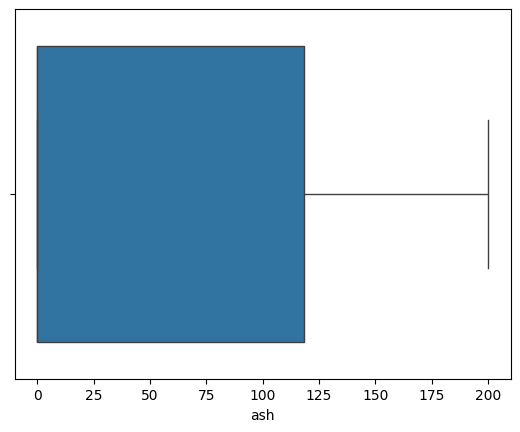

In [48]:
#Distribution of Ash

sns.boxplot(x='ash', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10168\4077625567.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['age']).set_title('ash')


<IPython.core.display.Javascript object>

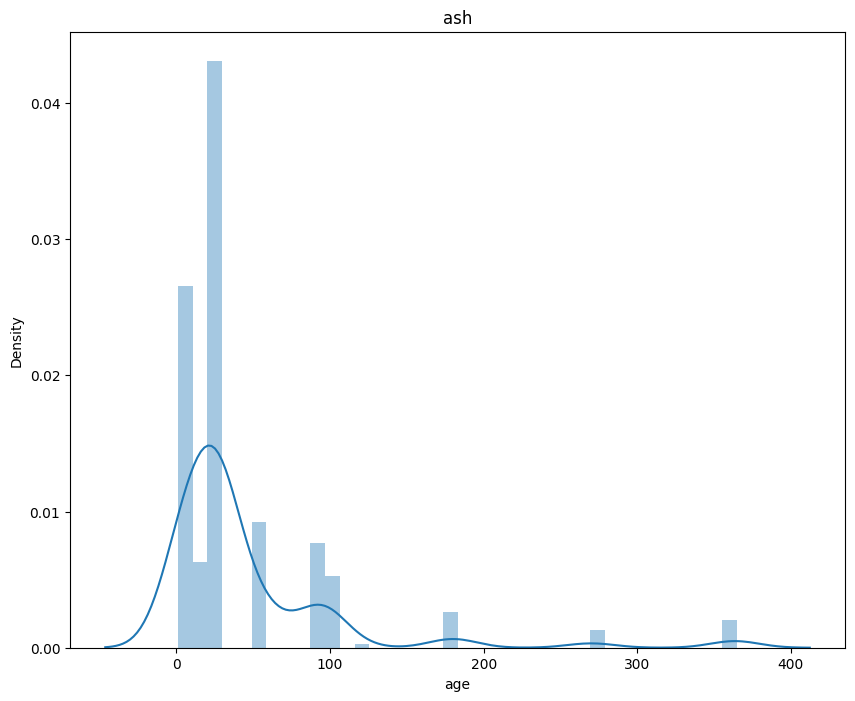

In [49]:
plt.figure(figsize=(10,8))
sns.distplot(df['age']).set_title('ash')
plt.show()

#### Superplasticizer

In [89]:
#Quartiles

superplasticizer_Q1=df['superplasticizer'].quantile(q=0.25)
superplasticizer_Q3=df['superplasticizer'].quantile(q=0.75)

print('1st Quartile (superplasticizer_Q1) is: ', superplasticizer_Q1)
print('3rd Quartile (superplasticizer_Q3) is: ', superplasticizer_Q3)
print('Interquartile range (superplasticizer_IQR) is: ', stats.iqr(df['superplasticizer']))

1st Quartile (superplasticizer_Q1) is:  0.0
3rd Quartile (superplasticizer_Q3) is:  10.2
Interquartile range (superplasticizer_IQR) is:  10.2


In [90]:
#Outlier detection from Interquartile range (IQR) in original data

L_outliers=superplasticizer_Q1-1.5*(superplasticizer_Q3-superplasticizer_Q1)
U_outliers=superplasticizer_Q3+1.5*(superplasticizer_Q3-superplasticizer_Q1)

print('Lower outlier in superplasticizer: ',L_outliers)
print('Upper outlier in superplasticizer: ',U_outliers)

Lower outlier in superplasticizer:  -15.299999999999999
Upper outlier in superplasticizer:  25.5


In [91]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in superplasticizer upper: ', df[df['superplasticizer']>25.5]['superplasticizer'].count())
print('Number of outliers in superplasticizer lower: ', df[df['superplasticizer']<-15.299999999999999]['superplasticizer'].count())

Number of outliers in superplasticizer upper:  10
Number of outliers in superplasticizer lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='superplasticizer'>

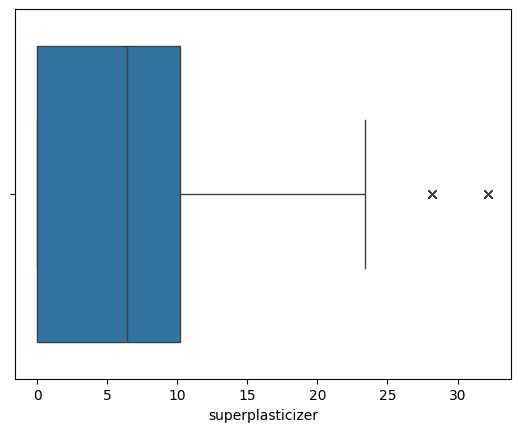

In [54]:
#Distribution of Ash

sns.boxplot(x='superplasticizer', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10168\2367884638.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['superplasticizer']).set_title('superplasticizer')


<IPython.core.display.Javascript object>

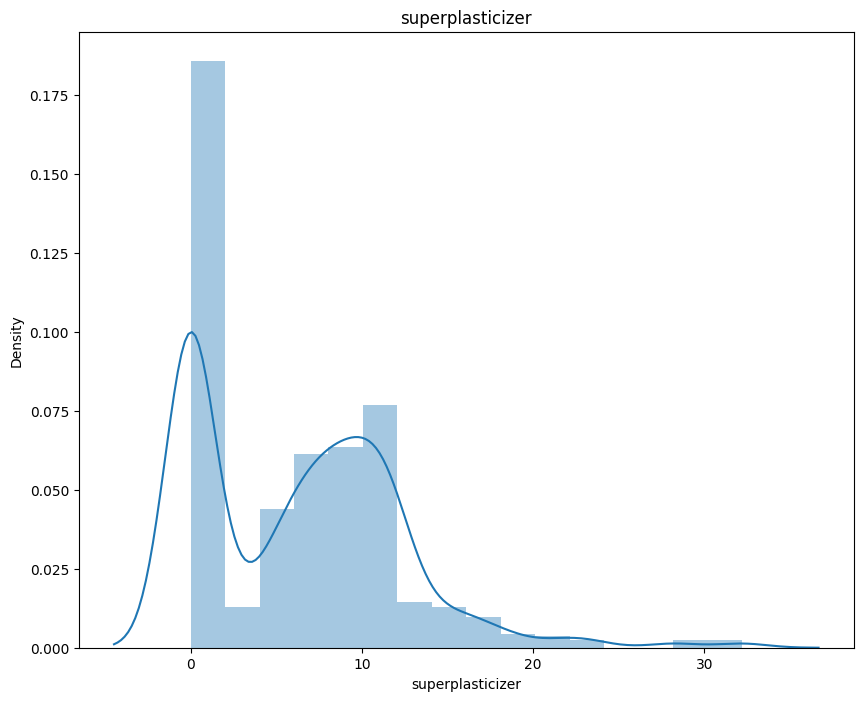

In [55]:
plt.figure(figsize=(10,8))
sns.distplot(df['superplasticizer']).set_title('superplasticizer')
plt.show()

#### coarseagg

In [87]:
#Quartiles

coarseagg_Q1=df['coarseagg'].quantile(q=0.25)
coarseagg_Q3=df['coarseagg'].quantile(q=0.75)

print('1st Quartile (coarseagg_Q1) is: ', coarseagg_Q1)
print('3rd Quartile (coarseagg_Q3) is: ', coarseagg_Q3)
print('Interquartile range (coarseagg_IQR) is: ', stats.iqr(df['coarseagg']))

1st Quartile (coarseagg_Q1) is:  932.0
3rd Quartile (coarseagg_Q3) is:  1029.4
Interquartile range (coarseagg_IQR) is:  97.40000000000009


In [88]:
# Calculate proper bounds

L_outliers=coarseagg_Q1-1.5*(coarseagg_Q3-coarseagg_Q1)
U_outliers=coarseagg_Q3+1.5*(coarseagg_Q3-coarseagg_Q1)

print('Lower outlier in superplasticizer: ',L_outliers)
print('Upper outlier in superplasticizer: ',U_outliers)

Lower outlier in superplasticizer:  785.8999999999999
Upper outlier in superplasticizer:  1175.5000000000002


In [85]:
#Checking for presenece of outliers with the upper and lower limits

print('Number of outliers in coarseagg upper: ', df[df['coarseagg']>1175.5000000000002]['coarseagg'].count())
print('Number of outliers in coarseagg lower: ', df[df['coarseagg']<785.8999999999999]['coarseagg'].count())

Number of outliers in coarseagg upper:  0
Number of outliers in coarseagg lower:  0


<IPython.core.display.Javascript object>

<Axes: xlabel='coarseagg'>

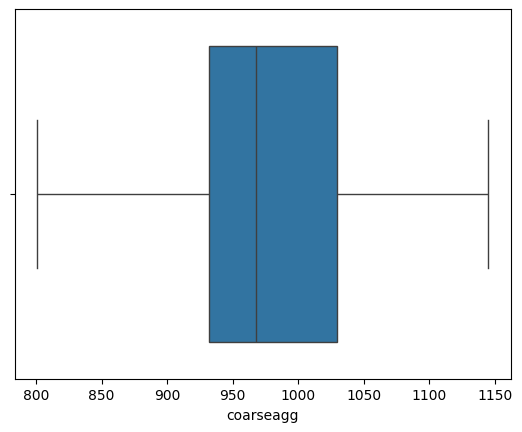

In [86]:
#Distribution of Ash

sns.boxplot(x='coarseagg', data=df, orient='h', flierprops=dict(marker='x', markerfacecolor='red', markersize=6))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\Admin\AppData\Local\Temp\ipykernel_10168\2997730633.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['coarseagg']).set_title('coarseagg')


<IPython.core.display.Javascript object>

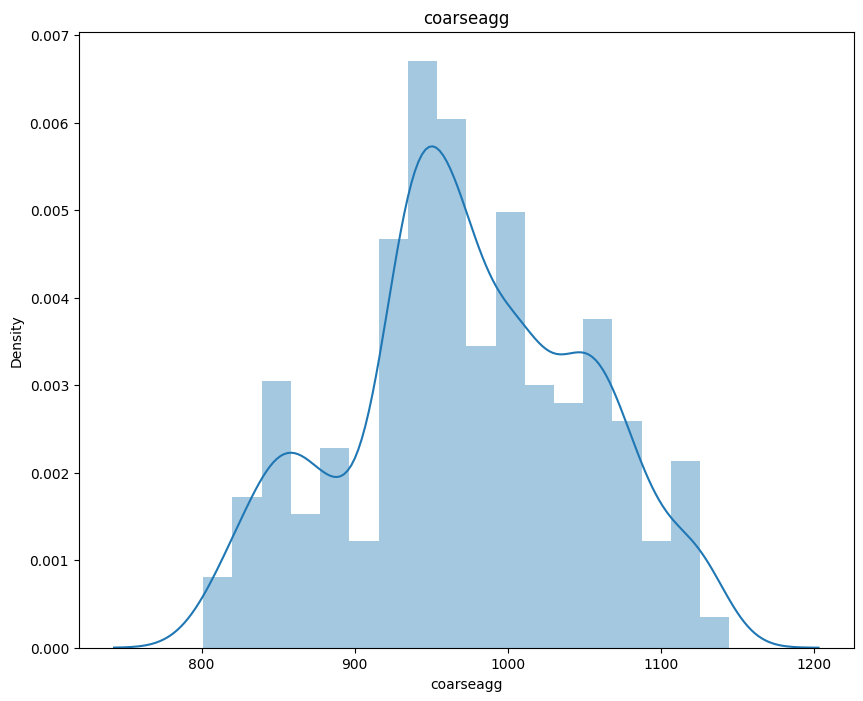

In [73]:
plt.figure(figsize=(10,8))
sns.distplot(df['coarseagg']).set_title('coarseagg')
plt.show()